# **Handwritten Digit Recognition with SVC**

## Imports

In [ ]:
import pandas as pd
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
import tensorflow as tf

## Data Collecting and Treatment

In [16]:
# Download data from mnist data set
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [17]:
# Reshape data from 3D array to 2D arrays (28x28 pixels -> 784)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [18]:
# Select a smaller sample of the sets for training and testing.
# 500 images/labels for training and 100 images/labels for testing
X_train = X_train[:500, :]
y_train = y_train[:500]
X_test = X_test[:100, :]
y_test = y_test[:100]

## Testing and Training

In [19]:
# Create support vector machine model for classification (SVC) and fit the training data.
model = svm.SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# Use the testing set on the model to make predictions.
y_pred = model.predict(X_test)

In [21]:
# Calculate the accuracy of the model
acc = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy: ', acc)


Accuracy:  0.88


## Visualization

In [50]:
# Set an index from the testing set to compare the predicted and actual label for that index
index_to_compare = 6

(-0.5, 27.5, 27.5, -0.5)

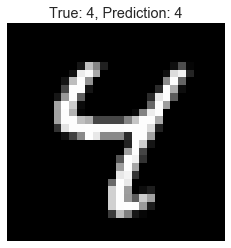

In [47]:
# Display Digit and prediction
title = 'True: ' + str(y_test[index_to_compare]) + ', Prediction: ' + str(y_pred[index_to_compare])
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.imshow(X_test[index_to_compare].reshape(28, 28), cmap='gray')
ax1.grid(None)
ax1.axis('off')

[Text(0, 0.5, 'Count')]

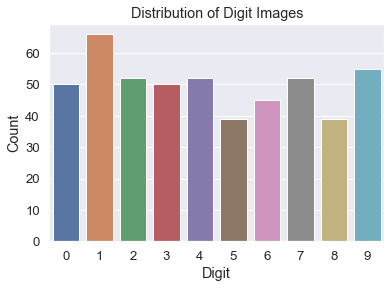

In [48]:
# Create Count Plot for Frequency Distribution
digits = pd.DataFrame.from_dict(y_train)

fig, ax2 = plt.subplots()
ax2 = sns.countplot(x=0, data=digits, ax=ax2)
ax2.set_title("Distribution of Digit Images")
ax2.set(xlabel='Digit')
ax2.set(ylabel='Count')

Text(28.5, 0.5, 'True Digit')

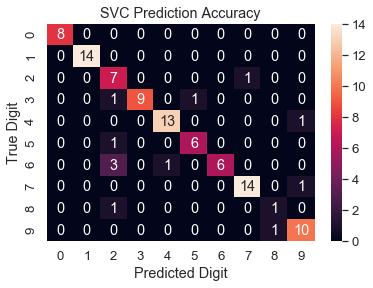

In [49]:
# Create Confusion Matrix and Heat Map
cm = metrics.confusion_matrix(y_test, y_pred)

fig, ax3 = plt.subplots()
ax3 = sns.heatmap(cm, annot=True, ax=ax3)
ax3.set_title("SVC Prediction Accuracy")
ax3.set_xlabel("Predicted Digit")
ax3.set_ylabel("True Digit")